### Diabetes Case Study

You now have had the opportunity to work with a range of supervised machine learning techniques for both classification and regression.  Before you apply these in the project, let's do one more example to see how the machine learning process works from beginning to end with another popular dataset.

We will start out by reading in the dataset and our necessary libraries.  You will then gain an understanding of how to optimize a number of models using grid searching as you work through the notebook. 

In [1]:
# Import our libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
sns.set(style="ticks")

#import check_file as ch

%matplotlib inline

# Read in our dataset
diabetes = pd.read_csv(r"diabetes.csv")

# Take a look at the first few rows of the dataset
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [2]:
diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

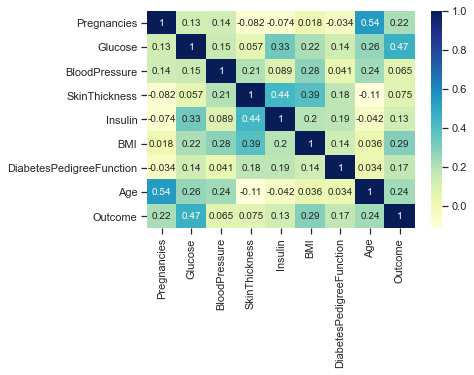

In [3]:
sns.heatmap(diabetes.corr(), annot=True, cmap="YlGnBu")


Because this course has been aimed at understanding machine learning techniques, we have largely ignored items related to parts of the data analysis process that come before building machine learning models - exploratory data analysis, feature engineering, data cleaning, and data wrangling.  

> **Step 1:** Let's do a few steps here.  Take a look at some of usual summary statistics calculated to accurately match the values to the appropriate key in the dictionary below. 

In [4]:
diabetes.Outcome.value_counts()


0    500
1    268
Name: Outcome, dtype: int64

In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

> **Step 2**: Since our dataset here is quite clean, we will jump straight into the machine learning.  Our goal here is to be able to predict cases of diabetes.  First, you need to identify the y vector and X matrix.  Then, the following code will divide your dataset into training and test data.   

In [6]:
y = diabetes['Outcome']
X = diabetes.drop(['Outcome'], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now that you have a training and testing dataset, we need to create some models that and ultimately find the best of them.  However, unlike in earlier lessons, where we used the defaults, we can now tune these models to be the very best models they can be.

It can often be difficult (and extremely time consuming) to test all the possible hyperparameter combinations to find the best models.  Therefore, it is often useful to set up a randomized search.  

In practice, randomized searches across hyperparameters have shown to be more time confusing, while still optimizing quite well.  One article related to this topic is available [here](https://blog.h2o.ai/2016/06/hyperparameter-optimization-in-h2o-grid-search-random-search-and-the-future/).  The documentation for using randomized search in sklearn can be found [here](http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py) and [here](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

In order to use the randomized search effectively, you will want to have a pretty reasonable understanding of the distributions that best give a sense of your hyperparameters.  Understanding what values are possible for your hyperparameters will allow you to write a grid search that performs well (and doesn't break).

> **Step 3**: In this step, I will show you how to use randomized search, and then you can set up grid searches for the other models in Step 4.  However, you will be helping, as I don't remember exactly what each of the hyperparameters in SVMs do.  Match each hyperparameter to its corresponding tuning functionality.



In [11]:
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# TODO: Define the classifier, and fit it to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test data
rf_preds = model.predict(X_test)


print("Model Accuracy is: ", model)

# Confusion Metrices for Decision Tree on train data.
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print("Confusion Metrices for Model")
print("{0}".format(metrics.confusion_matrix(y_test, rf_preds, labels=[0, 1])))

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, rf_preds, labels=[0,1])))


Model Accuracy is:  DecisionTreeClassifier()
Confusion Metrices for Model
[[76 23]
 [15 40]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.63      0.73      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154



In [12]:
# build a classifier
clf_rf = RandomForestClassifier()

# Set up the hyperparameter search
param_dist = {"max_depth": [3, 20],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# Run a randomized search over the hyperparameters
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Make predictions on the test data
rf_preds = random_search.best_estimator_.predict(X_test)

# Confusion Metrices for Decision Tree on train data.
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print("Confusion Metrices for Model")
print("{0}".format(metrics.confusion_matrix(y_test, rf_preds, labels=[0, 1])))

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, rf_preds, labels=[0,1])))

Confusion Metrices for Model
[[82 17]
 [20 35]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



In [13]:
random_search.best_params_

{'n_estimators': 88,
 'min_samples_split': 9,
 'min_samples_leaf': 8,
 'max_features': 2,
 'max_depth': 20,
 'criterion': 'gini',
 'bootstrap': False}

In [14]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

> **Step 4**: Now that you have seen how to run a randomized grid search using random forest, try this out for the AdaBoost and SVC classifiers.  You might also decide to try out other classifiers that you saw earlier in the lesson to see what works best.

In [15]:
# build a classifier for ada boost

ada_classifier = AdaBoostClassifier()

# Set up the hyperparameter search
params = {
          'learning_rate' :  [0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 10, 20],
          'n_estimators' :   [10,100,200,300,400,500] 
         }
# look at  setting up your search for n_estimators, learning_rate
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


# Run a randomized search over the hyperparameters
randomada_search = RandomizedSearchCV(ada_classifier, param_distributions=params)

# Fit the model on the training data
randomada_search.fit(X_train, y_train)

# Make predictions on the test data
ada_preds = randomada_search.best_estimator_.predict(X_test)


# Confusion Metrices for Decision Tree on train data.
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print("Confusion Metrices for adaboost Model")
print("{0}".format(metrics.confusion_matrix(y_test, ada_preds, labels=[0, 1])))

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, ada_preds, labels=[0,1])))


Confusion Metrices for adaboost Model
[[84 15]
 [19 36]]
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



In [26]:
randomada_search.best_estimator_.feature_importances_

array([0.002, 0.238, 0.076, 0.026, 0.082, 0.174, 0.188, 0.214])

In [17]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
randomada_search.best_params_

{'n_estimators': 500, 'learning_rate': 0.05}

In [22]:
features = diabetes.columns

In [23]:
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [27]:
importances = randomada_search.best_estimator_.feature_importances_
indices = np.argsort(importances)
range(len(indices))
importances[indices]

array([0.002, 0.026, 0.076, 0.082, 0.174, 0.188, 0.214, 0.238])

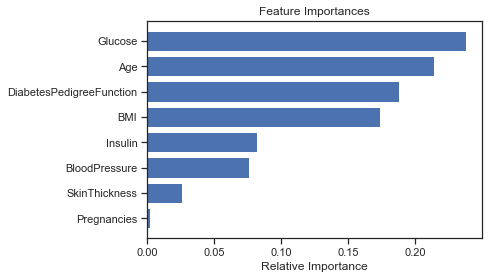

In [28]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

> **Step 8**:  Now provide a summary of what you did through this notebook, and how you might explain the results to a non-technical individual.  When you are done, check out the solution notebook by clicking the orange icon in the upper left.

This has given a detail on how to choose the right algorithm based on your business need. It explains how to find the best parameters for different algorithms, train models and find the best algorithm based on accuracy.    LaTeX:  𝛼2